In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
import os 
import sys 
path='../src/'
if path not in sys.path: 
    sys.path.insert(1,path)
from utils_OB import *
from preposessing import *

import traceback
import psutil 
import gc

%load_ext autoreload
%autoreload 2



In [3]:
folder_path='C:/Users/olebfa/OneDrive - NTNU/00Master - Onedrive/OB ymse/5hz_resampled_int_tans/fil'

print(os.path.split(folder_path))

('C:/Users/olebfa/OneDrive - NTNU/00Master - Onedrive/OB ymse/5hz_resampled_int_tans', 'fil')


In [3]:
folder_path='../../resampl/'
names=os.listdir(folder_path)
names.sort()
# file_path=folder_path+names[6]
# print(names[0])
# dataframe=pd.read_pickle(file_path)

error_file='HB141M-2013-12-25_07-58-53.pkl'

# Testing: 

In [33]:

ac_channels=['H1 East_x', 'H1 East_y', 'H1 East_z', 'H1 Vest_x',
     'H1 Vest_y',
       'H1 Vest_z', 'H2 Vest_x', 'H2 Vest_y', 'H2 Vest_z', 'H3 East_x',
       'H3 East_y', 'H3 East_z', 'H3 Vest_x', 'H3 Vest_y', 'H3 Vest_z',
       'H4 East_x', 'H4 East_y', 'H4 East_z', 'H4 Vest_x', 'H4 Vest_y',
       'H4 Vest_z', 'H5 East_x', 'H5 East_y', 'H5 East_z', 'H5 Vest_x',
       'H5 Vest_y', 'H5 Vest_z', 'H6 East_x', 'H6 East_y', 'H6 East_z',
       'H6 Vest_x', 'H6 Vest_y', 'H6 Vest_z', 'H7 East_x', 'H7 East_y',
       'H7 East_z', 'H7 Vest_x', 'H7 Vest_y', 'H7 Vest_z', 'H8 East_x',
       'H8 East_y', 'H8 East_z', 'H9 East_x', 'H9 East_y', 'H9 East_z',
       'H9 Vest_x', 'H9 Vest_y', 'H9 Vest_z', 'H10 East_x', 'H10 East_y',
       'H10 East_z', 'H10 Vest_x', 'H10 Vest_y', 'H10 Vest_z', 'H11 East_x',
       'H11 East_y', 'H11 East_z', 'H11 Vest_x', 'H11 Vest_y', 'H11 Vest_z',]

with open('log_file.txt','a') as file:
    file.write('\n\n\n\n\n ######################  New test ######################\n\n')

count=0
for file_p in names:

    count+=1

    file_p=error_file
    try:
        # if file_p not in os.listdir('../../5hz_covssi/'):
        name=os.path.split(path)[-1]
        with open('log_file.txt','a') as log_file:
            log_file.write('\n'+str(name)+':\n')

            df=pd.read_pickle(path)

            log_file.write('Data Frame info:\n '+str(df.info())+':\n')

            data_arr=df[ac_channels].to_numpy(copy=True).T
            data_arr=np.nan_to_num(data_arr,nan=0.0)


            log_file.write('\n\nData_arr: '+str(np.shape(data_arr)))


        ts=df['timeseries'].to_numpy()
        fs=len(ts)/(ts[-1]-ts[0])

            # ts=ts_via_cov_ssi_df(path,orders,depth)
            # ts.save('../../5hz_covssi/')
    except Exception as a:
        with open('log_file.txt','a') as file:
            file.write(str(file_p)+ '  feil: '+str(a))
        # continue
    if count > 0: 
        break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 89 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   H1 East_x       3100 non-null   float64
 1   H1 East_y       3100 non-null   float64
 2   H1 East_z       3100 non-null   float64
 3   H1 Vest_x       3100 non-null   float64
 4   H1 Vest_y       3100 non-null   float64
 5   H1 Vest_z       3100 non-null   float64
 6   H2 Vest_x       3100 non-null   float64
 7   H2 Vest_y       3100 non-null   float64
 8   H2 Vest_z       3100 non-null   float64
 9   H3 East_x       3100 non-null   float64
 10  H3 East_y       3100 non-null   float64
 11  H3 East_z       3100 non-null   float64
 12  H3 Vest_x       3100 non-null   float64
 13  H3 Vest_y       3100 non-null   float64
 14  H3 Vest_z       3100 non-null   float64
 15  H4 East_x       3100 non-null   float64
 16  H4 East_y       3100 non-null   float64
 17  H4 East_z       3100 non-null   f

0


In [21]:
print(np.shape(data_arr))
print(np.shape(ts))

(60, 3100)
(3100,)


# Run this: 

In [3]:

for file_p in names:

    try:
        if file_p not in os.listdir('../../5hz_covssi/'):    
            with open('log_file.txt','a') as file:
                file.write('\n\n ######################  New test ######################\n\n')
                file.close()
            path=folder_path+file_p    
            orders=np.arange(50,200,2)
            depth=120
            ts=ts_via_cov_ssi_df(path,orders,depth)
            ts.save('../../5hz_covssi/')
            gc.collect()
    except Exception as a:
        with open('log_file.txt','a') as file:
            file.write(str(file_p)+' feil: '+str(a)+'\n\n')
            traceback.print_exc(file=file)
            total_memory=psutil.virtual_memory()[0]
            used_memory=psutil.virtual_memory()[3]
            free_memory=psutil.virtual_memory()[4]

            file.write('\nMemory status: \n')
            file.write('   Used: '+str(round(used_memory/10**9,3))+'Gb')
            file.write('\n   Free:: '+str(round(free_memory/10**9,3))+'Gb')
            file.write('\n   Percentage: '+str(round((
                used_memory/total_memory) * 100, 2)))
            file.close()
        ssid=None
        gc.collect()
        continue

In [7]:
prev_discovered_modes=np.array([0.052,0.105,0.119,0.142,0.183,0.206,0.212,
                                0.23,0.276,0.318,0.333,0.374,0.401,0.418])



In [8]:
A=np.array([[1,2,3,4],[np.NaN,3,4,5]])

if not np.isfinite(A).all():
    A,C,G,R0=(0,0,0,0)
    raise ValueError('Infinite values found in A')


ValueError: Infinite values found in A

# Clustering 

In [6]:
valid_range= { 'freq': [0.025*2*np.pi, 6.28],'damping': [-0.02,np.inf] }

indicator='freq'
s=5
stabcrit = {'freq':0.6, 'damping': 0.8, 'mac': 0.8}
prob_threshold = 0.99   #probability of pole to belong to 
# cluster, based on estimated "probability" density function

min_cluster_size=50
min_samples=20
scaling={'mac':1, 'lambda_real':1, 'lambda_imag': 1}

# ts.find_stable_poles(orders,s,stabcrit,valid_range,indicator)

info={r"$\bf{Valid range:}$"+'\n' :valid_range,
      r"$\bf{Indicator}$": indicator,
      r"$\bf{S}$":s,
      r"$\bf{Stabcrit}$":stabcrit,
      '\n'+r"$\bf{P\ treshold}$": prob_threshold,
      r"$\bf{Min.\ cluster\ size}$":min_cluster_size,
      r"$\bf{Min.\ samples}$":min_samples,
      r"$\bf{Scaling: }$"+'\n':scaling,
      '\n'+r"$\bf{Total\ number\ of\ clusters: }$":0
      }
name='fr-'+str(valid_range['freq'])+'_xir-'+str(
    valid_range['damping'])+'_'+indicator+'_'+'S-'+str(
    s)+'_scrit-'+str(stabcrit['freq'])+'-'+str(
    stabcrit['damping'])+'-'+str(
    stabcrit['mac'])+'-'+'_mcs-'+str(
    min_cluster_size)+'_ms-'+str(min_samples)+'_sc-'+str(
    scaling['mac'])+'-'+str(scaling['lambda_real'])+'-'+str(
    scaling['lambda_imag']
    )  

In [9]:

for name in os.listdir('../../../5hz_covssi_interpolated/'):
    if name not in os.listdir('../../../5hz_clustered_int/'):
        ts=import_converted_ts('../../../5hz_covssi_interpolated/',name)
        ts.find_stable_poles(
            s,stabcrit,valid_range,indicator)
        ts.cluster(prob_threshold,min_cluster_size,min_samples,scaling)
        ts.create_confidence_intervals()
        ts.save('../../../5hz_clustered_int/')
    # if name=='HB141M-2013-12-17_13-57-26.pkl':
    #     break

c:\Users\olebfa\AppData\Local\anaconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebfa\AppData\Local\anaconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebfa\AppData\Local\anaconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebfa\AppData\Local\anaconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebfa\AppData\Local\anaconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebfa\AppData\Local\anaconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebfa\AppData\L

### Checking clustering results


In [8]:
i=-100
files= os.listdir('../../../5hz_clustered_int/')
name=files[i]
ts=import_converted_ts('../../../5hz_clustered_int/',name)

PlotStabDiagFromTsObject(ts,xmax=0.5,display=True,color='mac')

<Figure size 1500x800 with 2 Axes>

In [52]:
n_clusters=np.array([])
for name in files:
    ts=import_converted_ts('../../../5hz_clustered_2_first100/',name)

    n_clusters=np.append(n_clusters,len(np.where(np.abs(ts.lambds_median)<0.5*2*np.pi)[0]))
print(ts.lambds_median)
matplotlib.use('tkagg')
figure,ax=plt.subplots() 
ax.plot(range(len(n_clusters)),n_clusters)
ax.grid()
ax.axhline(13)
for i,point in enumerate(n_clusters):
    ax.annotate(str(point),(i,point),textcoords=('offset pixels'),xytext=(3,-3))
figure.show()

[0.15324284104492197, 0.32299636156144496, 0.6672996073478495, 0.7698677821258507, 0.8911594847237141, 1.1498702756489998, 1.2890086948213975, 1.330841364418219, 1.5183371829968366, 1.72808588596892, 2.0178355241520523, 2.081759085316387, 2.32523478893294, 2.513517089215496, 2.550971032332134, 2.6130942454161445, 2.955546882987902, 3.2191146680428733, 3.3104921265596308, 3.4340257991529333, 3.4620616288529953, 3.6627045438513504, 3.7545305841843475, 3.9170991435943012, 4.472809624570169, 5.651385764065464, 6.27684632551511, 6.626851067588125, 6.953812610291225, 7.660928638995962, 8.378111085667378, 9.163635325860497, 9.925601475709048, 10.772966126277733, 11.51812163097173]


## Plotting segments

In [1]:
PlotSegmentsFromFolder('../../../5hz_clustered_2_first100/',bs=False)

NameError: name 'PlotSegmentsFromFolder' is not defined

In [7]:
for name in os.listdir('D:/data_disk/5hz_clustered_2/'):
    ts=import_converted_ts('D:/data_disk/5hz_clustered_2/',name)
    ts.create_confidence_intervals()
    ts.save('D:/data_disk/5hz_clustered_2/') 


In [7]:
segments=[]
names=os.listdir('../../5hz_clustered_2/')
names.sort()
for name in names[::10]:
    ts=import_converted_ts('../../5hz_clustered_2/',name)
    segments.append(ts)



KeyboardInterrupt: 

## Importing the temperature data: 

In [4]:
# print(dir(ts))

path='../../../data/Temperaturdata 2 stasjoner.csv'
data=pd.read_csv(path,sep=';')
# data['Lufttemperatur']=data['Lufttemperatur'].astype(float)

data['Tid(norsk normaltid)']=pd.to_datetime(data['Tid(norsk normaltid)'],format='%d.%m.%Y %H:%M')
data.set_index(['Tid(norsk normaltid)'],inplace=True)
# data[
    # 'Tid(norsk normaltid)'].astype('datetime64[ns]')
data.head()
ullensvang=data[data['Navn']=='Ullensvang Forsøksgard']



def TempFromTs(df,ts): 
    name=ts.series_metadata['file_name']
    date=name[7:20] #YYYY-MM-DD_hh
    # print(date)
    date_obj=pd.to_datetime(date,format='%Y-%m-%d_%H')
    # print(date_obj)
    idx = df.iloc[df.index.get_indexer((date_obj,), method='nearest')]
    return idx['Lufttemperatur'][0]
    # print(df.get(idx))

TempFromTs(ullensvang,ts)

20.1

In [5]:
def getTempsFromFilenames(segments):
    segment_temps=np.array([])
    for segment in segments:
        temp= TempFromTs(ullensvang,segment)
        segment_temps=np.append(segment_temps,temp) 
    return segment_temps
segment_temps=getTempsFromFilenames(segments)

## Plotting temperature for the segments 

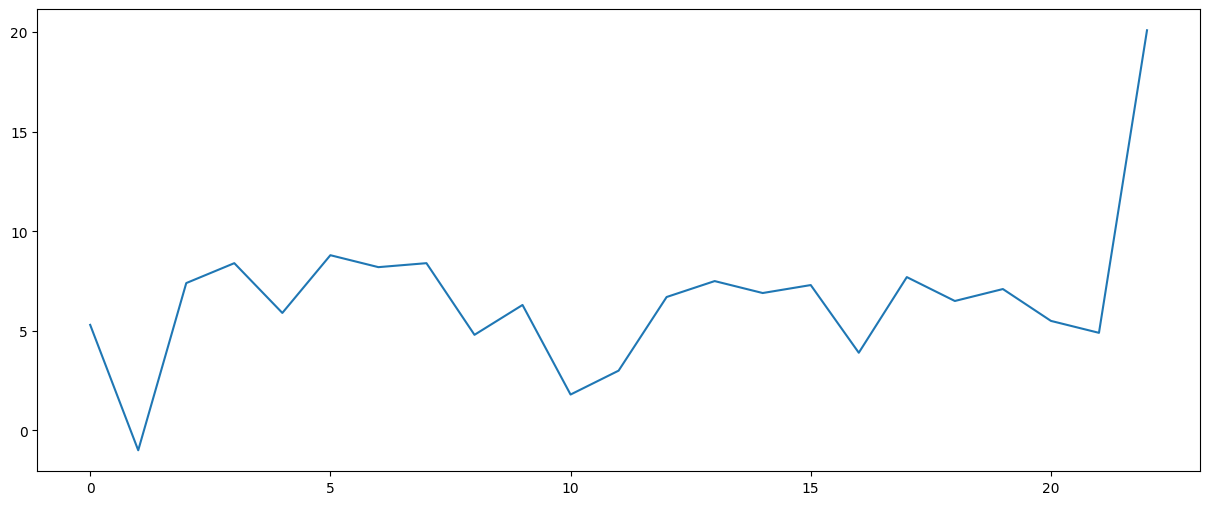

In [6]:
# matplotlib.use('module://matplotlib_inline.backend_inline') #setting backend in case cells are not run in appropriate order
plt.figure(figsize=(15,6))
plt.plot(range(len(segment_temps)),segment_temps)  
plt.show()

In [79]:
arr=np.array([1,2,3,4,5,6,7,8])
ix=(np.where(arr<4)[0])
print(arr[ix])
print(dir(ts))

[1 2 3]
['PHI_median', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'bs_lambds', 'bs_lambds_confidence', 'bs_phi', 'bs_phi_confidence', 'cluster', 'create_confidence_intervals', 'do_covssi', 'do_covssi_strid', 'find_stable_poles', 'get_from_general_metadata', 'ix_stab', 'lambd', 'lambd_stab', 'lambds_median', 'lambds_n_auto', 'order_auto', 'orders', 'orders_stab', 'phi', 'phi_auto', 'phi_stab', 'save', 'sensor_metadata', 'series_metadata', 'set_atr', 'set_general_metadata', 'stabdiag', 'xi_auto']


## Plotting the segments

In [85]:
PlotPolesFromSegments(segments)

# Temperaturgreier: 

In [25]:

temps={}
temp_sonsors=['A1_temperature','A2_temperature','A3_temperature','A4_temperature',
              'A5_temperature','A6,temperature','A7_temperature',
              'A8_temperature','A9_temparature']
for file in os.listdir('D:/data_disk/5hz_clustered_1/'):
    if os.path.isfile('D:/data_disk/5hz_clustered_1/'+file):
            
        ts=import_converted_ts('D:/data_disk/resampl/',file)
        temp=np.mean(ts['A6_temperature'])
        temps.append(temp)
        # if file[:-4]+'png' not in os.listdir(
            # 'D:/data_disk/5hz_clustered/stabdiags/'):
        info={'Date:':file[7:19]}
        # first_freqs.append(ts.lambds_median[0])

        # fig=PlotStabDiagFromTsObject(
        #     ts,display=False,true_w=prev_discovered_modes,
        #     xmax=0.45,info=info,figsize=(15,7))
        # # print(file)
        # plt.savefig(
        #     'D:/data_disk/5hz_clustered_1/stabdiags/'+file[:-4]+'png',dpi=300)
        # plt.close()

In [2]:
temp_sensors=['date','A1_temperature','A2_temperature','A3_temperature','A4_temperature',
              'A5_temperature','A6_temperature','A7_temperature',
              'A8_temperature','A9_temperature']

# df_temp=dataframe.filter(temp_sensors).copy()
# df_temp=df_temp.mean(axis=0)
# print(df_temp.head())
# df_temp.info()

# temp_sensors.insert(0,'dato')
# # print(columns)


# print(DF_temperature.head())
# DF_temperature.append(df_temp,ignore_index=True)



DF_temperature=pd.DataFrame(columns=temp_sensors)
temp_sonsors=['A1_temperature','A2_temperature','A3_temperature','A4_temperature',
              'A5_temperature','A6,temperature','A7_temperature',
              'A8_temperature','A9_temparature']

for file in os.listdir('D:/data_disk/resampl/'):
    if os.path.isfile('D:/data_disk/resampl/'+file):

        dataframe=import_converted_ts('D:/data_disk/resampl/',file)

        df_temp=dataframe.filter(temp_sensors).copy()
        df_temp=df_temp.mean(axis=0).to_frame().transpose()
        df_temp['date']=file[7:-4]
        # print(df_temp.head())

        # df_temp['date']=file[7:]
        DF_temperature=pd.concat(
            [df_temp,DF_temperature],axis=0)
        # DF_temperature.append(df_temp,ignore_index=True)
        # if file[:-4]+'png' not in os.listdir(
            # 'D:/data_disk/5hz_clustered/stabdiags/'):


pd.to_datetime(DF_temperature['date'],format='%Y-%m-%d_%H-%M-%S')
DF_temperature.set_index(['date'],inplace=True)
DF_temperature.sort_index(inplace=True)      


In [3]:
DF_temperature.sort_index(inplace=True)      

DF_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 2013-12-05_01-27-08 to 2017-10-28_03-27-33
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A1_temperature  2268 non-null   float64
 1   A2_temperature  2436 non-null   float64
 2   A3_temperature  1787 non-null   float64
 3   A4_temperature  2352 non-null   float64
 4   A5_temperature  1775 non-null   float64
 5   A6_temperature  2436 non-null   float64
 6   A7_temperature  2436 non-null   float64
 7   A8_temperature  2352 non-null   float64
 8   A9_temperature  2436 non-null   float64
dtypes: float64(9)
memory usage: 190.3+ KB


In [4]:
matplotlib.use('tkagg')
figure=DF_temperature.plot(y=['A1_temperature','A2_temperature','A3_temperature',
                       'A4_temperature','A5_temperature','A6_temperature',
                       'A7_temperature','A8_temperature','A9_temperature']
                       ,figsize=(50,20),linewidth=0.2)
plt.show()

In [27]:
first_freqs=[]

for file in os.listdir('D:/data_disk/5hz_clustered_1/'):
    if os.path.isfile('D:/data_disk/5hz_clustered_1/'+file):
            
        ts=import_converted_ts('D:/data_disk/5hz_clustered_1/',file)
        # if file[:-4]+'png' not in os.listdir(
            # 'D:/data_disk/5hz_clustered/stabdiags/'):
        info={'Date:':file[7:19]}
        first_freqs.append(ts.lambds_median[0])

        # fig=PlotStabDiagFromTsObject(
        #     ts,display=False,true_w=prev_discovered_modes,
        #     xmax=0.45,info=info,figsize=(15,7))
        # # print(file)
        # plt.savefig(
        #     'D:/data_disk/5hz_clustered_1/stabdiags/'+file[:-4]+'png',dpi=300)
        # plt.close()

In [41]:
l=ts.lambd
# print(l)
# plot_stab_from_KOMA(lambd=l,true_w=prev_discovered_modes)
PlotStabDiagFromTsObject(ts,display=True,true_w=prev_discovered_modes,xmax=0.5,color='mac')

<Figure size 1500x800 with 2 Axes>

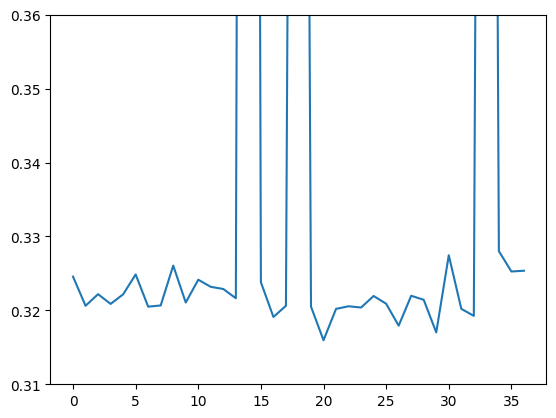

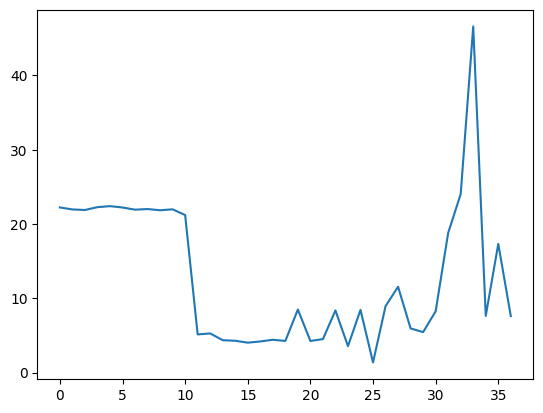

In [29]:
plt.plot(range(len(first_freqs)),first_freqs)
plt.ylim(0.31,0.36)
plt.show()
plt.plot(range(len(temps)),temps)